<a href="https://colab.research.google.com/github/anesz271/NN-first-steps/blob/main/CNN_to_classify_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries and dataset from CIFAR-10
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

170500096/170498071 [==============================] - 4s 0us/step


In [2]:
FIRST_LAYER = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))
HIDDEN_LAYER_TYPE_1 = layers.MaxPooling2D(2, 2)
HIDDEN_LAYER_TYPE_2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')
HIDDEN_LAYER_TYPE_3 = tf.keras.layers.MaxPooling2D(2,2)
HIDDEN_LAYER_TYPE_4 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')
HIDDEN_LAYER_TYPE_5 = tf.keras.layers.Dense(64, activation='relu')
LAST_LAYER = tf.keras.layers.Dense(10, activation='softmax')

model = models.Sequential([
       FIRST_LAYER,
       HIDDEN_LAYER_TYPE_1,
       HIDDEN_LAYER_TYPE_2,
       HIDDEN_LAYER_TYPE_3,
       HIDDEN_LAYER_TYPE_4,
       layers.Flatten(),
       HIDDEN_LAYER_TYPE_5,
       LAST_LAYER,
])

Epoch 1/20
1563/1563 [==============================] - 70s 44ms/step - loss: 1.7796 - accuracy: 0.3358 - val_loss: 1.3043 - val_accuracy: 0.5418
Epoch 2/20
1563/1563 [==============================] - 68s 44ms/step - loss: 1.2449 - accuracy: 0.5587 - val_loss: 1.1321 - val_accuracy: 0.5977
Epoch 3/20
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0867 - accuracy: 0.6167 - val_loss: 1.0397 - val_accuracy: 0.6348
Epoch 4/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9782 - accuracy: 0.6596 - val_loss: 0.9954 - val_accuracy: 0.6506
Epoch 5/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9161 - accuracy: 0.6784 - val_loss: 0.9356 - val_accuracy: 0.6735
Epoch 6/20
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8457 - accuracy: 0.7012 - val_loss: 0.9593 - val_accuracy: 0.6616
Epoch 7/20
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7859 - accuracy: 0.7246 - val_loss: 0.8934 -

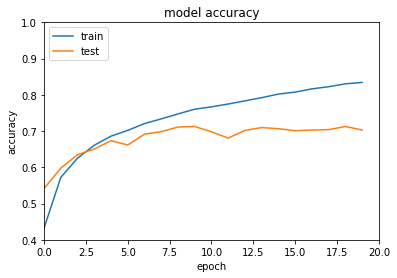

In [3]:
LOSS = 'sparse_categorical_crossentropy'
NUM_EPOCHS = 20

# compile the model
model.compile(optimizer='adam',
              loss=LOSS,
              metrics=['accuracy'])

# fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS, 
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()